# 🏆 CONVERSION RATE CHALLENGE EVALUATOR
**Évaluation des prédictions du Conversion Rate Challenge**

Ce notebook simule l'évaluateur Kaggle pour comparer vos prédictions avec les vrais labels.

## 📘 1. Imports & setup

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

import matplotlib.pyplot as plt
import seaborn as sns

## 📥 2. Charger les fichiers

Les fichiers doivent être dans le même dossier :
- ```test_labels.csv``` → labels réels
- ```predictions.csv``` → tes prédictions (une seule colonne "converted")

In [17]:
# Charger les labels officiels du test
df_true = pd.read_csv("conversion_data_test_labels.csv")

# Charger les prédictions
df_pred = pd.read_csv("conversion_data_test_predictions_Albert-model2.csv")

## 🔍 3. Vérification automatique des fichiers

In [18]:
print("Aperçu labels :")
display(df_true.head())

print("\nAperçu prédictions :")
display(df_pred.head())

print("\nFormes :")
print(df_true.shape, df_pred.shape)

Aperçu labels :


,converted
0,1
1,0
2,0
3,0
4,0



Aperçu prédictions :


,converted
0,1
1,0
2,0
3,0
4,0



Formes :
(31620, 1) (31620, 1)


## ⚠️ Vérifier la présence de la colonne "converted"

In [19]:
if "converted" not in df_true.columns:
    raise ValueError("❌ test_labels.csv doit contenir une colonne 'converted'")

if "converted" not in df_pred.columns:
    raise ValueError("❌ predictions.csv doit contenir UNE colonne 'converted'")

## 🔧 Vérification des dimensions

In [20]:
if len(df_true) != len(df_pred):
    raise ValueError(f"❌ Les longueurs diffèrent : {len(df_true)} vs {len(df_pred)}")
else:
    print("✔️ Nombre de lignes OK")

✔️ Nombre de lignes OK


## 🧹 4. Préparation des arrays

In [21]:
y_true = df_true["converted"].astype(int).values
y_pred = df_pred["converted"].astype(int).values

## 📊 5. Classification Report complet

In [22]:
print("=== Classification Report ===\n")
print(classification_report(y_true, y_pred, digits=4))

=== Classification Report ===

              precision    recall  f1-score   support

           0     0.9898    0.9955    0.9926     30600
           1     0.8373    0.6912    0.7573      1020

    accuracy                         0.9857     31620
   macro avg     0.9135    0.8433    0.8749     31620
weighted avg     0.9848    0.9857    0.9850     31620



## 📈 6. Métriques globales

In [23]:
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)

metrics_df = pd.DataFrame({
    "Accuracy": [acc],
    "F1 Score": [f1],
    "Precision": [prec],
    "Recall": [rec]
})

display(metrics_df)

,Accuracy,F1 Score,Precision,Recall
0,0.985705,0.75725,0.837292,0.691176


## 🧱 7. Matrice de confusion

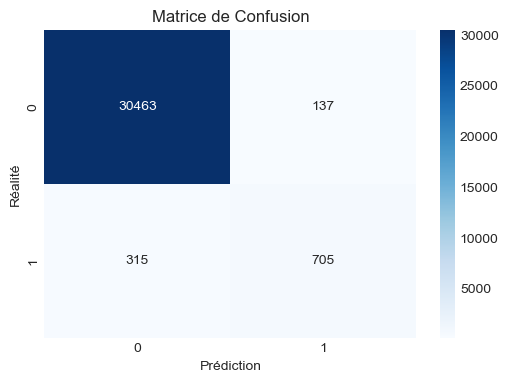

In [24]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

## 🎉 8. Score de compétition type Kaggle

In [25]:
kaggle_score = f1
print(f"🏆 Score de compétition (F1) = {kaggle_score:.4f}")

🏆 Score de compétition (F1) = 0.7573
